In [7]:
import torch
import numpy as np
x=np.arange(10,dtype='float32').reshape((10,1))
print(x)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]


In [8]:
y=np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],dtype='float32')
print(y)

[1.  1.3 3.1 2.  5.  6.3 6.6 7.4 8.  9. ]


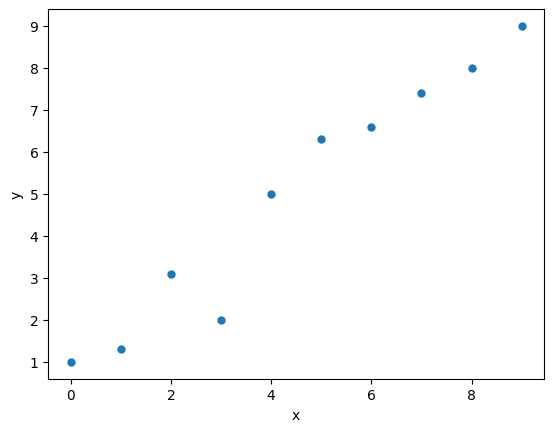

In [9]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o',markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
from torch.utils.data import TensorDataset,DataLoader
x_train_norm=(x-np.mean(x))/np.std(x)
x_train_norm=torch.from_numpy(x_train_norm)
y_train_norm=torch.from_numpy(y)
train_ds=TensorDataset(x_train_norm,y_train_norm)
batch_size=1
train_dl= DataLoader(train_ds,batch_size,shuffle=True)



In [13]:
print(x_train_norm)

tensor([[-1.5667],
        [-1.2185],
        [-0.8704],
        [-0.5222],
        [-0.1741],
        [ 0.1741],
        [ 0.5222],
        [ 0.8704],
        [ 1.2185],
        [ 1.5667]])


In [14]:
print(y_train_norm)

tensor([1.0000, 1.3000, 3.1000, 2.0000, 5.0000, 6.3000, 6.6000, 7.4000, 8.0000,
        9.0000])


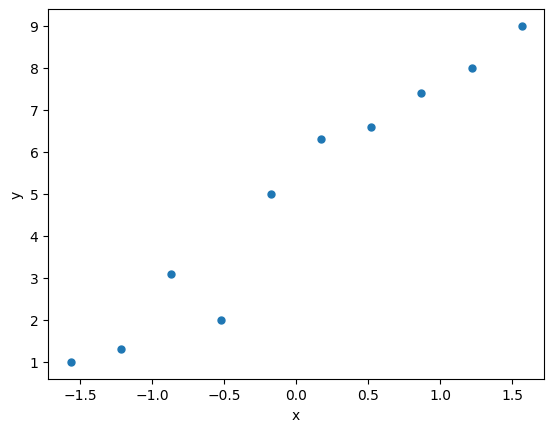

In [15]:
plt.plot(x_train_norm,y_train_norm,'o',markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
torch.manual_seed(1)
weight=torch.randn(1)
print(weight)

tensor([0.6614])


In [16]:
weight.requires_grad_()
bias=torch.zeros(1,requires_grad=True)


In [17]:
print(bias)

tensor([0.], requires_grad=True)


In [18]:
def model(xb):
    return xb@weight+bias

In [19]:
def loss_fn(input,target):
    return (input-target).pow(2).mean()

In [23]:
learning_rate=0.001
num_epochs=200
log_epochs=10
for epochs in range(num_epochs):
    for x_batch,y_batch in train_dl:
        pred=model(x_batch)
        loss=loss_fn(pred,y_batch)
    with torch.no_grad():
        weight-=weight.grad*learning_rate
        bias-=bias.grad*learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epochs %log_epochs==0:
        print(f"Epoch {epochs} | Loss: {loss.item():.4f}")
        _

Epoch 0 | Loss: 5.4482
Epoch 10 | Loss: 13.4332
Epoch 20 | Loss: 26.0420
Epoch 30 | Loss: 4.1093
Epoch 40 | Loss: 5.4482
Epoch 50 | Loss: 38.9516
Epoch 60 | Loss: 26.0420
Epoch 70 | Loss: 38.9516
Epoch 80 | Loss: 4.3938
Epoch 90 | Loss: 4.1093
Epoch 100 | Loss: 38.9516
Epoch 110 | Loss: 13.4332
Epoch 120 | Loss: 38.9516
Epoch 130 | Loss: 4.1093
Epoch 140 | Loss: 46.3778
Epoch 150 | Loss: 46.3778
Epoch 160 | Loss: 63.1726
Epoch 170 | Loss: 26.0420
Epoch 180 | Loss: 4.1093
Epoch 190 | Loss: 38.0952
